# Project Topic: Human Overpopulation Projections for the 21st Century

## Introduction:
Given the finite amount of basic resources and necessities, human overpopulation is a serious socioeconomic and environmental concern that has the potential to result in exhaustion of natural resources, environmental degradation, climate change, rising unemployment, increased poverty, and wider income inequality. Within the scope of human history, the world population has grown at an abnormally unprecedented rate over the course of the last century due to developments in health and food quality. Though the consequences of such drastic growth are unknown, methods to forecast future patterns of human population growth and prevent future negative outcomes of overpopulation is critical for fostering a sustainable future for humanity.

## Research Question: 
***To what degree can we  predict human population growth in the 21st century using computational tools and methods?***

## Data Sources: 
- United Nations Department of Economic and Social Affairs, Population Dynamics: https://population.un.org/wpp/Download/Standard/Population/ 
- History Database of the Global Environment (HYDE): https://themasites.pbl.nl/tridion/en/themasites/hyde/
- Our World in Data (OWID): https://ourworldindata.org/

![title](images/image.png)

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
from matplotlib.pyplot import figure
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 1. Collect and import data
Since the United Nations was formed in 1945, historical population data from the United Nations Department of Economic and Social Affairs only consists of data collected starting from 1950 to present-day. Supplement this initial data with expected historical population data from History Database of the Global Environment (HYDE) in order to accumulate a broader and more comprehensive dataset.

**Features**: Entity (string), Code (string), Year (integer), Population(integer)

In [2]:
pop_by_country = pd.read_csv('data/population.csv')
pop_world = pd.read_csv('data/world_population.csv')
pop_by_country['Population'] = pop_by_country['Population']/1e9
pop_world['Population'] = pop_world['Population']/1e9
pop_world_after_1950 = pop_world[pop_world['Year']>=1950]

### 2. Visualize and observe trends & patterns

Text(0, 0.5, 'World Population in Billions')

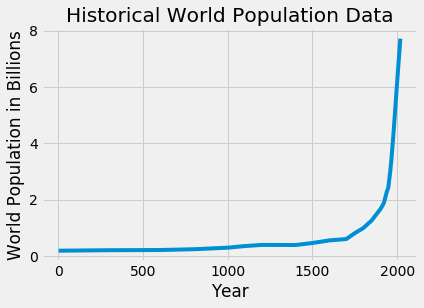

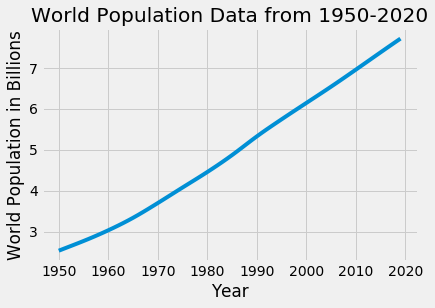

In [3]:
plt.figure(0)
plt.plot(pop_world['Year'], pop_world['Population'])
plt.title('Historical World Population Data')
plt.xlabel('Year')
plt.ylabel('World Population in Billions')
plt.figure(1)
plt.plot(pop_world_after_1950['Year'], pop_world_after_1950['Population'])
plt.title('World Population Data from 1950-2020')
plt.xlabel('Year')
plt.ylabel('World Population in Billions')

## Linear Regression:
Linear regression is the most commonly used type of predictive analysis, used for forecasting future events and determining the strength of predictors. Simple linear regression is a statistical method for obtaining a formula to predict values of one variable from another where there is a causal relationship between the
two variables.

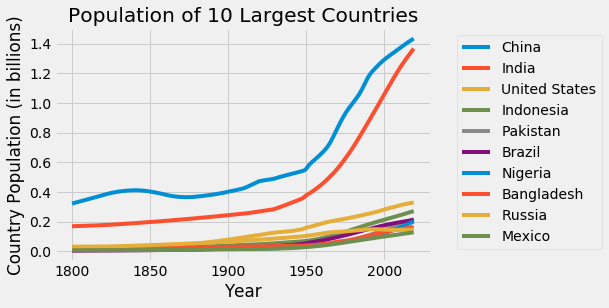

In [4]:
top_10 = pop_by_country[pop_by_country['Year']==2019].sort_values('Population', ascending=False).head(10)['Entity']
for country in top_10:
    top_10_pop = pop_by_country[pop_by_country['Entity']==country]
    plt.plot(top_10_pop['Year'], top_10_pop['Population'], label=country)
plt.title('Population of 10 Largest Countries')
plt.xlabel('Year')
plt.ylabel('Country Population (in billions)')
plt.legend(bbox_to_anchor=(1.05, 1))

### 3. Compute and sum linear regression for individual countries

In [5]:
countries = pop_by_country['Entity'].unique()
predicted_world_pop = [0]*81
for country in countries:
    country_data = pop_by_country[pop_by_country['Entity']==country].reset_index(drop=True)
    country_data_after_1950 = country_data[country_data['Year']>=1950]
    x, y = country_data_after_1950['Year'], country_data_after_1950['Population']
    mean_x = round(sum(x) / len(x), 2)
    mean_y = round(sum(y) / len(y), 2)
    B1 = sum((x - mean_x) * (y-mean_y)) / sum((x - mean_x) **2)
    B0 = mean_y - (B1 * mean_x)
    predicted_country_pop = []
    for i in range(2020, 2101):
        predicted_country_pop.append(B1*i + B0)
    predicted_world_pop = [x + y for x, y in zip(predicted_world_pop, predicted_country_pop)]

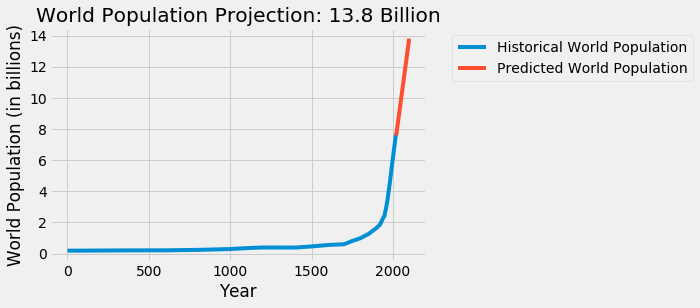

In [6]:
plt.plot(pop_world['Year'], pop_world['Population'], label='Historical World Population')
plt.plot(range(2020, 2101), predicted_world_pop, label='Predicted World Population')
plt.title('World Population Projection: 13.8 Billion')
plt.xlabel('Year')
plt.ylabel('World Population (in billions)')
plt.legend(bbox_to_anchor=(1.05, 1))

## Logistic Population Model:

Logistic models for population growth assumes that resources are finite and there is a carrying capacity for the population. Curve fitting is the process of constructing a curve, or mathematical function, that has the best fit to a series of data points, possibly subject to constraints. Logistic curve fitting is based on the shape of sigmoid functions, specifically. Scipy's optimize library is used for fitting functions onto nonlinear data using a least squares optimization approach. 

In [7]:
from scipy.optimize import curve_fit
def sigmoid(x, c0, c1, c2):
    return c2/(1+c0*(np.e**(-c1*x)))
g = [0.5e13, 0.015, 10.5]

### 4. Fit logistic curve to world population data

In [8]:
x, y = pop_world['Year'], pop_world['Population']
coefficients, covariance = curve_fit(sigmoid, x.values, y.values, g)
y_fit = np.empty(len(pop_world['Year']))
y_predicted = np.empty(len(pop_world['Year']))
for i in range(len(pop_world['Year'])):
    y_fit[i] = sigmoid(x[i], coefficients[0], coefficients[1], coefficients[2])
    y_predicted[i] = sigmoid(x[i], g[0], g[1], g[2])

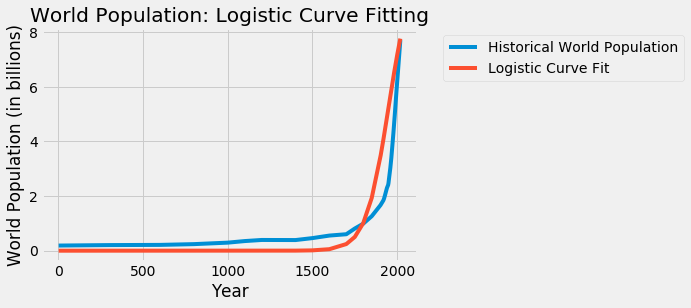

In [9]:
plt.figure(0)
plt.plot(pop_world['Year'], pop_world['Population'], label='Historical World Population')
plt.plot(pop_world['Year'], y_predicted, label='Logistic Curve Fit')
plt.title('World Population: Logistic Curve Fitting')
plt.xlabel('Year')
plt.ylabel('World Population (in billions)')
plt.legend(bbox_to_anchor=(1.05, 1))

### 4. Extrapolate future values

In [10]:
y_fit_long = np.empty(981)
y_predicted_long = np.empty(981)
for i in range(2020, 3001):
    y_fit_long[i-2020] = sigmoid(i, coefficients[0], coefficients[1], coefficients[2])
    y_predicted_long[i-2020] = sigmoid(i, g[0], g[1], g[2])

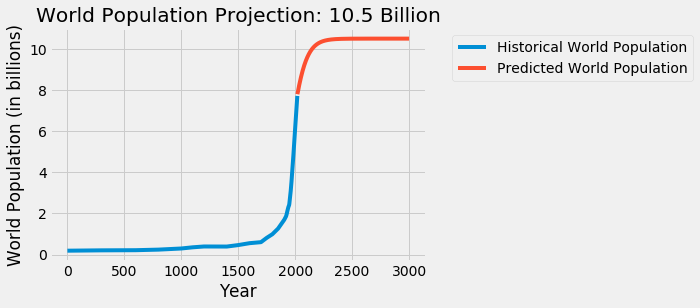

In [11]:
plt.plot(pop_world['Year'], pop_world['Population'], label='Historical World Population')
plt.plot(range(2020, 3001), y_predicted_long, label='Predicted World Population')
plt.title('World Population Projection: 10.5 Billion')
plt.xlabel('Year')
plt.ylabel('World Population (in billions)')
plt.legend(bbox_to_anchor=(1.05, 1))

## Cohort-Component Method:
The Cohort-Component Method is the most commonly method to produce population projections, by incorporating variables such as ***fertility***, ***mortality***, and ***international migration***. The Cohort-Component Method is a powerful approach used within the methodology of the United Nations Department of Economic and Social Affairs, Population  Dynamics to confidently forecast populations. 

**Source**: Our World in Data (OWID): https://ourworldindata.org/

### 6. Import data

In [12]:
cohort_full = pd.read_csv('data/cohort.csv')
world_cohort_full = pd.read_csv('data/world_cohort.csv')
cohort = cohort_full[cohort_full['Year']<=2015].drop('Population Growth Rate', 1)
world_cohort = world_cohort_full[world_cohort_full['Year']<=2015].drop('Population Growth Rate', 1)
entities = []
for country in countries:
    if country in cohort_full['Entity'].unique():
        entities.append(country)

Text(0, 0.5, 'Growth Rate (in percent)')

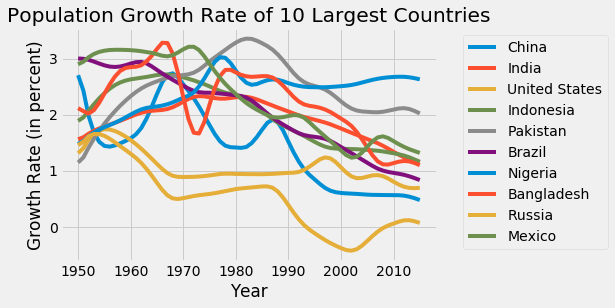

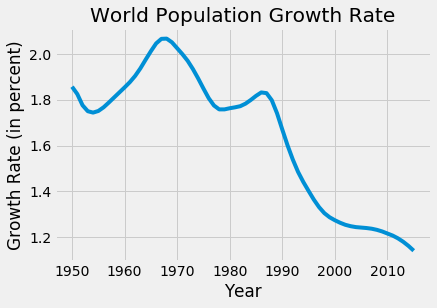

In [13]:
figure(0)
for country in top_10:
    top_10_cohort = cohort_full[cohort_full['Entity']==country]
    plt.plot(top_10_cohort['Year'], top_10_cohort['Population Growth Rate Estimates'], label=country)
plt.title('Population Growth Rate of 10 Largest Countries')
plt.xlabel('Year')
plt.ylabel('Growth Rate (in percent)')
plt.legend(bbox_to_anchor=(1.05, 1))
figure(1)
plt.plot(world_cohort['Year'], world_cohort['Population Growth Rate Estimates'])
plt.title('World Population Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (in percent)')

### 7. Compute and sum linear regression for individual countries

In [14]:
expected_world_pop = [0]*86
for entity in top_10:
    country_data = cohort[cohort['Entity']==entity].reset_index(drop=True)
    country_pop = pop_by_country[pop_by_country['Entity']==entity]
    country_2015_pop = country_pop[country_pop['Year']==2015]['Population'].iloc[0]
    x, y = country_data['Year'], country_data['Population Growth Rate Estimates']
    mean_x = round(sum(x) / len(x), 2)
    mean_y = round(sum(y) / len(y), 2)
    B1 = sum((x - mean_x) * (y-mean_y)) / sum((x - mean_x) **2)
    B0 = mean_y - (B1 * mean_x)
    predicted_growth_rates = []
    for i in range(2015, 2101):
        predicted_growth_rates.append(B1*i + B0)
    country_expected_pop = []
    for r in predicted_growth_rates:
        country_expected_pop.append(country_2015_pop)
        country_2015_pop = country_2015_pop * 1+(r/100)
    expected_world_pop = [x + y for x, y in zip(expected_world_pop, country_expected_pop)]

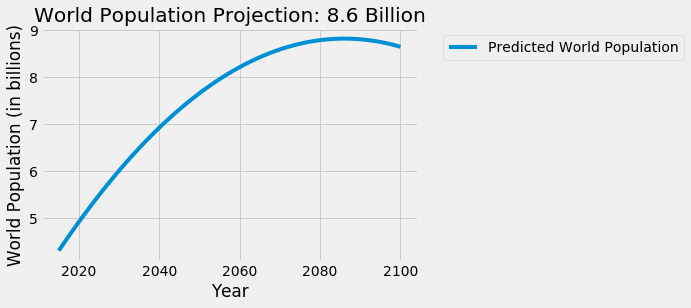

In [15]:
plt.plot(range(2015, 2101), expected_world_pop, label='Predicted World Population')
plt.title('World Population Projection: 8.6 Billion')
plt.xlabel('Year')
plt.ylabel('World Population (in billions)')
plt.legend(bbox_to_anchor=(1.05, 1))

# Conclusion:

### Computational Summary:

***Linear Regression***: *13.8 Billion*

***Logistic Population Model***: *10.5 Billion*

***Cohort-Component Model***: *8.6 Billion*

***Average***: *10.96 Billion*

![title](images/un_proj.png)

### Closing Statements:

Our results indicate that the world population will continue to increase for the majority of the 21st century, with an expected average of 10.96 billion. With respect to our initial research question, there are significant limitations and assumptions that arise with population projections. The main assumption in this overall approach, as well as machine learning in general, is that future data can be accurately predicted based on past data. Within the scope of population growth prediction, this is not necessarily true due to unpredictable factors such as global war, disease, or natural disasters. However, this assumption is critical to machine learning as it allows humans to optimize future decision making based on the accumulation of as much present information as possible.

Through this investigation, I gained a deeper understanding of machine learning tools and algorithms for prediction and extrapolation. It is impossible to determine the accuracy of any projection method without future data. Given more time and resources, I would collect more comprehensive datasets with more detailed features and explore different methods beyond linear regressions for making projections such as light gradient boosting or autoregressive integrated moving averages (ARIMA). 

# DH101 Project

![carti](images/world.png)

This is the repository for my Berkeley DH101 project under Professor Evan Muzzall during Summer 2020 Session A.

### Group Project Abstract

Human interpretation and contextualization are critical components of computational data analysis. Given that data are interpretable objects with inherently subjective processes of design, methodology, and representation, human biases and preexisting assumptions convolute notions of objectivity and accuracy. Through a collaborative process involving my classmates Urvi Guglani and Akshatha Muralidhar, our group project explores the limitations of digitial humanites with respect to implicit assumptions and biases within modern data practices. The long-term implications of our study reveal widespread misinterpretation of data, reduced credibility of data research, and the proliferation of algorithmic bias within complex sociotechnical systems in the future. To address these concerns, our findings suggest the institutional need for raising disciplinary standards within the digital humanities. An emphasis on peer collaboration, editorial stringency, and disciplinary judgement is necessary for promoting reliable interpretations of data and results in our datafied future.

**Sources**:    
"Critical Questions for Big Data", Dana Boyd and Kate Crawford     
"The Digital Humanities Debacle", Nan Z. Da    
"Defining Data for Humanists: Text, Artifact, Information, or Evidence?", Trevor Owens     
"Meaning and Mining: The Impact of Implicit Assumptions in Data Mining for the Humanities", D. Scuelly and B. M. Pasanek


### Individual Project Abstract

Human overpopulation is an ongoing socioeconomic and environmental concern that has the potential to result in exhaustion of natural resources, environmental degradation, climate change, rising unemployment, increased poverty, and wider income inequality. My individual project explores patterns of human growth and overpopulation in the 21st century using relevant computation tools and methods. Using fertility, mortality, international migration, and historical world population data, my project utilizes linear regression, logistic population modeling, and cohort-component modeling in order to generate population projections for the year 2100. The inital results indicate that the world population will continue to increase for the majority of the 21st century, with an expected average population of 10.96 billion. These findings raise significant questions regarding the sustainability of human populations in the future.

**Sources**:    
